In [13]:
%matplotlib inline

import sys
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
import time as time2
import numpy as np
import pandas as pd
import xarray as xr
import eofs
from eofs.standard import Eof
import glob

# you need intake-esm V 2020.11.4 and intake V 0.6.0

# import tensorflow as tf

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.geometry.polygon import LinearRing


import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib import cm

import copy
import fsspec
import intake                                        

In [14]:
# Read Control Run
d = '/glade/scratch/acsubram/S2S_Database/IVT_20170130.nc'
dsfcst = xr.open_dataset(d)

In [15]:
dsfcst

<xarray.Dataset>
Dimensions:     (latitude: 121, longitude: 240, number: 50, step: 47)
Coordinates:
  * number      (number) int64 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * latitude    (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
    valid_time  (step) datetime64[ns] ...
Data variables:
    ivt         (number, step, latitude, longitude) float32 ...

In [16]:
ivt = dsfcst['ivt']
lat = dsfcst['latitude']
lon = dsfcst['longitude']

In [17]:
ivt_plt = ivt[1,30,:,:]

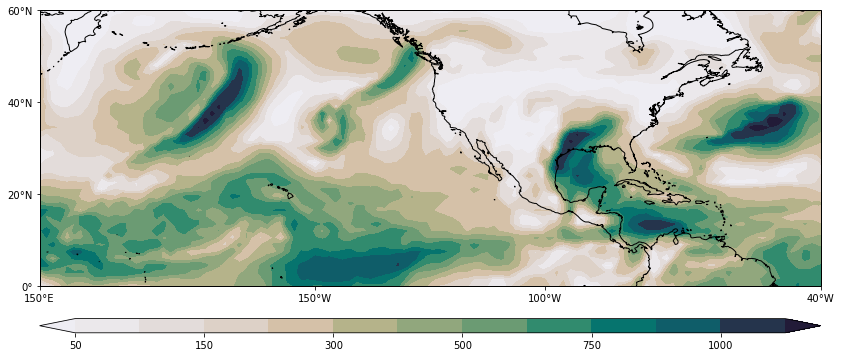

In [26]:


mapcrs = ccrs.PlateCarree(central_longitude=180.0, globe=None)

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([150, 320 , 0, 60], ccrs.PlateCarree())
# ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_xticks([150, 210, 260, 320], crs=ccrs.PlateCarree())
ax.set_yticks([0, 20, 40, 60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))


# Plot IVT
clevs = [50,100,150,200,300,400,500,600,750,850,1000,1250]
cf = ax.contourf(lon, lat, ivt_plt , clevs, cmap = cmocean.cm.rain,
                 transform=datacrs, extend="both")
#cmap=plt.cm.BuPu

plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)
# fig.savefig('AR_Track_ens1.png', bbox_inches='tight')

In [28]:
df = xr.open_dataset('/glade/scratch/acsubram/S2S_Database/ERA5/ERA5_IVT_20161201.nc')

In [29]:
df

<xarray.Dataset>
Dimensions:  (lat: 721, lon: 1440, time: 24)
Coordinates:
  * time     (time) datetime64[ns] 2016-12-01 ... 2016-12-01T23:00:00
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
Data variables:
    IVT      (time, lat, lon) float64 ...
    uIVT     (time, lat, lon) float64 ...
    vIVT     (time, lat, lon) float64 ...
    IWV      (time, lat, lon) float64 ...
Attributes:
    Conventions:                CF-1/0
    history:                    Tue Jul 14 13:29:00 2020: /apps/nco-4.9.3_gnu...
    history_of_appended_files:  Tue Jul 14 13:29:00 2020: Appended file ERA5_...
    NCO:                        netCDF Operators version 4.9.3 (Homepage = ht...